# Loading Data From Kaggle
## Loading csv into dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)


In [2]:
import pandas as pd
df = pd.read_csv(r"creditcard.csv")
print (len(df)) # Check length

284807


# Data Exploration

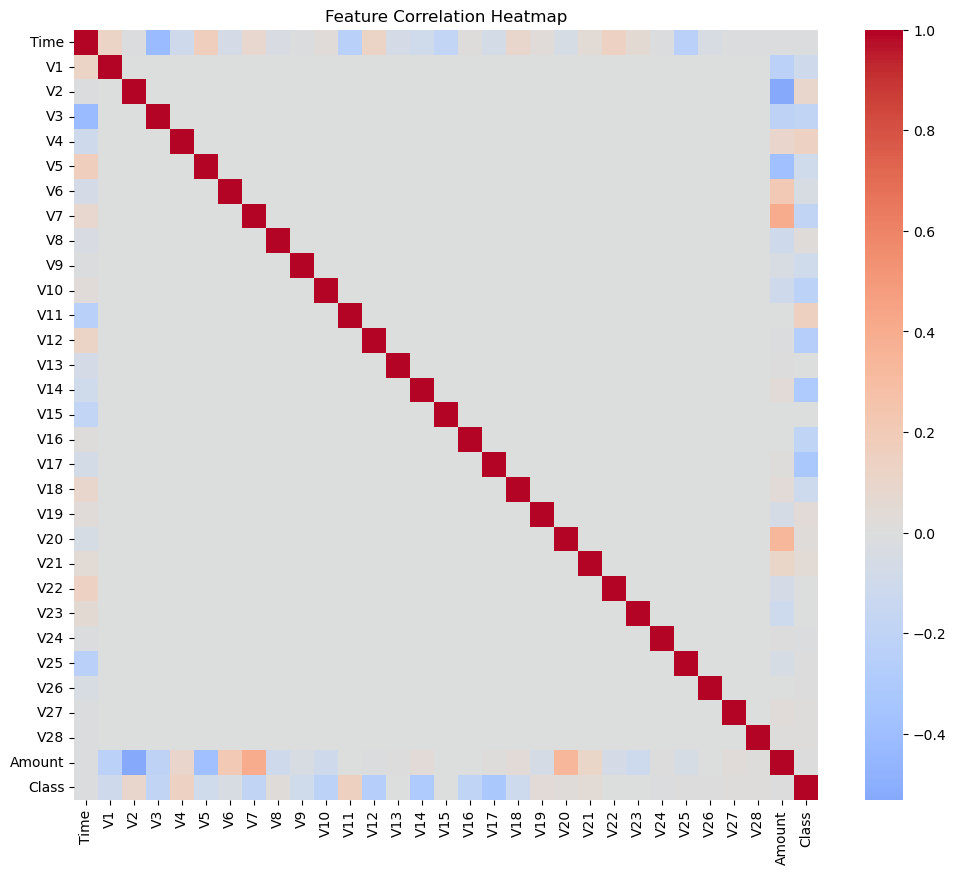

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

print(df.isna().sum()) # No missing values


# Data Preparation

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('Class', axis=1)  
y = df['Class']


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,      
    random_state=42
)


# Train the model, make predictions (Random Forest Classifier)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score

# Model parameters adjusted after several iterations 
model = RandomForestClassifier(max_depth=4, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]  



# Plot the results 

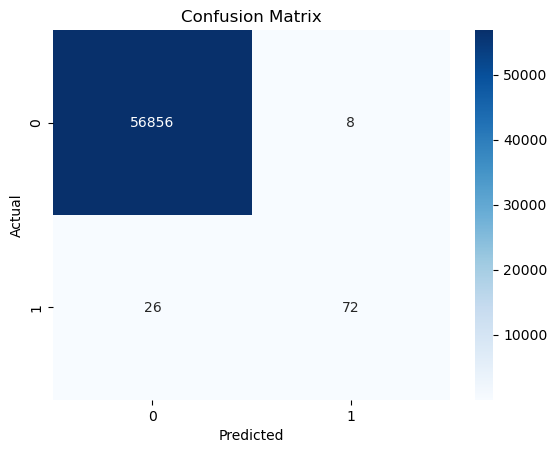

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.73      0.81        98

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Average Precision (AUPRC): 0.8213


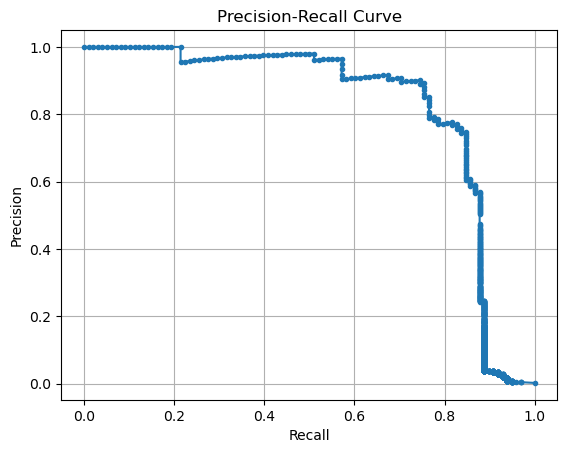

In [7]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)
print(f"Average Precision (AUPRC): {ap_score:.4f}")

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Resulting best model after tests

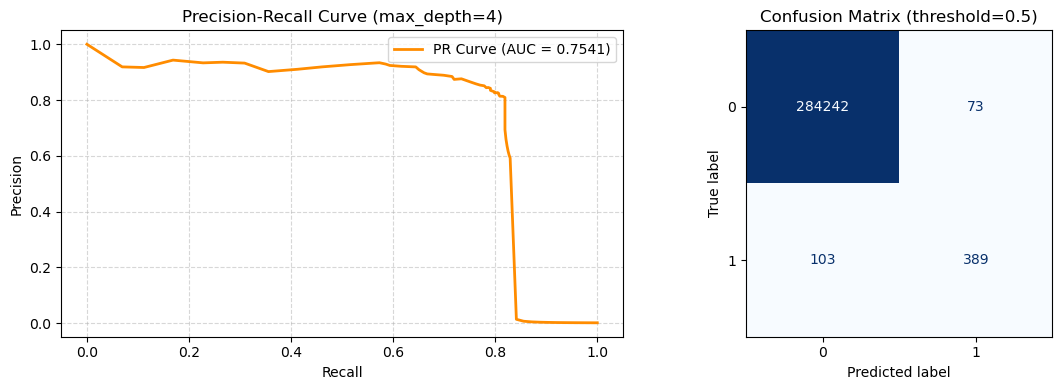

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_scores = cross_val_predict(dt_model, X, y, method='predict_proba', cv=cv)[:, 1]

precision, recall, _ = precision_recall_curve(y, y_scores)
pr_auc = average_precision_score(y, y_scores)

threshold = 0.5
y_pred = (y_scores >= threshold).astype(int)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve (max_depth=4)')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()

disp.plot(ax=axes[1], cmap='Blues', values_format='d', colorbar=False)
axes[1].set_title(f'Confusion Matrix (threshold={threshold})')

plt.tight_layout()
plt.show()


# Several tests performed below
The code below shows some of the tests conducted to fine-tune the model's hyperparameters . Only some are shown for readability
Several plots are created to evaluate the performance, including accuracy metrics, which are not too important in this case.
The report shows all kinds of tests performed and their results

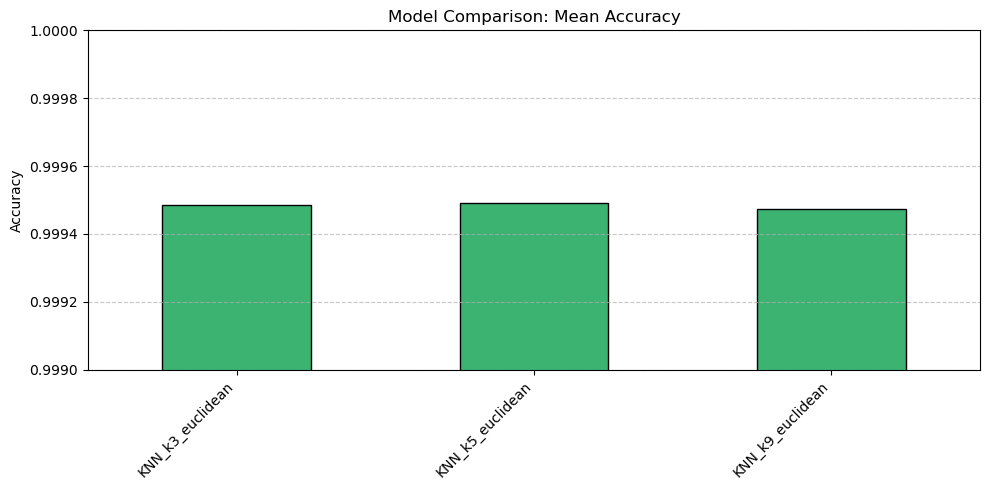

In [9]:
import matplotlib.pyplot as plt
df_results.rename(index={"KNN_k13_custom": "KNN_13_euclidean"}, inplace=True)

mean_accuracy = df_results.loc["Mean Accuracy"].astype(float)

plt.figure(figsize=(10, 5))
mean_accuracy.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Model Comparison: Mean Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.999, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

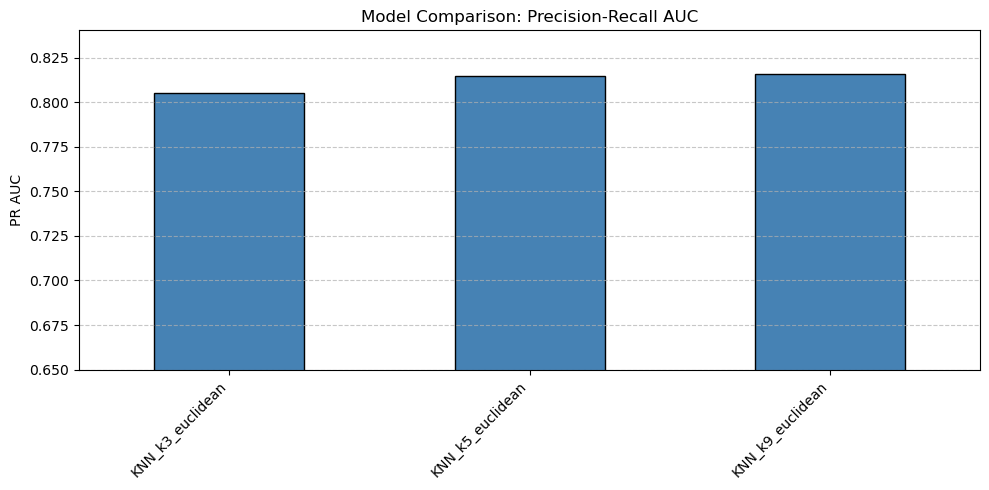

,KNN_k3_euclidean,KNN_k5_euclidean,KNN_k9_euclidean
Mean Accuracy,0.999485,0.999491,0.999473
PR AUC,0.805114,0.814492,0.815885


In [12]:
pr_auc = df_results.loc["PR AUC"].astype(float)

plt.figure(figsize=(10, 5))
pr_auc.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Model Comparison: Precision-Recall AUC")
plt.ylabel("PR AUC")
plt.ylim(0.65, pr_auc.max() * 1.03)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_results